# Pymaceuticals Inc.
---

### Analysis

 

In [332]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = study_results.merge(mouse_metadata, on="Mouse ID", how="left", )

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [333]:
# Checking the number of mice. 
len(mouse_complete["Mouse ID"].unique())

249

In [334]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_complete.loc[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()[0]
duplicate_mice = mouse_complete.loc[mouse_complete["Mouse ID"] == duplicate].index
print(duplicate)

g989


In [335]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_complete.loc[mouse_complete["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [336]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_complete.drop(duplicate_mice)
mouse_data_clean.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [337]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_clean["Mouse ID"].unique())

248

## Summary Statistics

In [338]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_groupby = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drug_mean = drug_groupby.mean()
drug_median = drug_groupby.median()
drug_var = drug_groupby.var()
drug_std = drug_groupby.std()
drug_st_error = drug_groupby.sem()
mouse_drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean, "Median Tumor Volume": drug_median,
                                  "Tumor Volume Variance": drug_var, "Tumor Volume Std. Dev.":drug_std,
                                  "Tumor Volume Std. Err.":drug_st_error})
mouse_drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [339]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

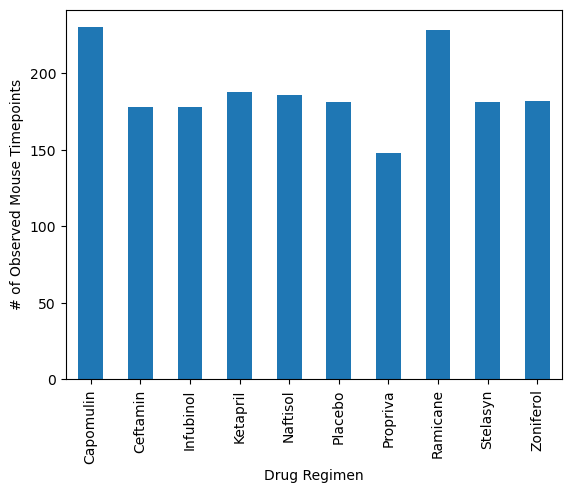

In [340]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data_clean.groupby("Drug Regimen").count()["Mouse ID"].plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

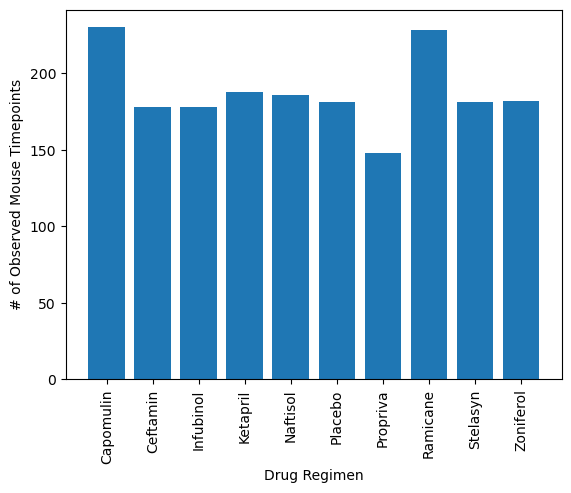

In [341]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_by_drug = mouse_data_clean.groupby("Drug Regimen").count()["Mouse ID"]
x_axis = [0,1,2,3,4,5,6,7,8,9]
plt.bar(x_axis,timepoints_by_drug.values,)
plt.xticks(x_axis,timepoints_by_drug.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

<AxesSubplot:ylabel='Sex'>

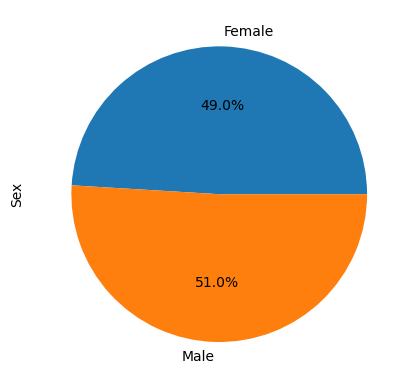

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_distribution = mouse_data_clean.groupby("Sex").count()["Mouse ID"]
mice_distribution.name = "Sex"
mice_distribution.plot(kind="pie",autopct="%1.1f%%")

Text(0.5, 1.0, 'Sex')

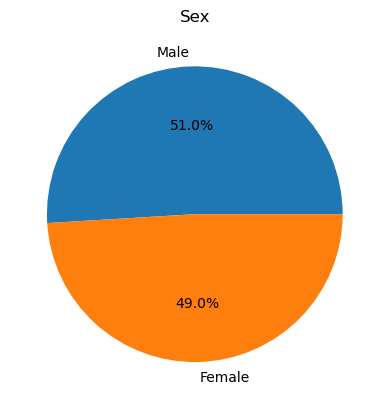

In [343]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_number = len(mouse_data_clean[mouse_data_clean["Sex"] == "Male"])
female_number = len(mouse_data_clean[mouse_data_clean["Sex"] == "Female"])
labels = ["Male","Female"]
male_female_distribution = [male_number, female_number]
plt.pie(male_female_distribution,labels=labels,autopct="%1.1f%%")
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [344]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
 
# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint = mouse_data_clean.groupby("Mouse ID").max()["Timepoint"]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_last_timepoint_combined = mouse_data_clean.merge(mouse_last_timepoint, on=["Mouse ID", "Timepoint"], how="right")
mouse_last_timepoint_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [345]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_size_by_treatment = {}

for treatment in treatments:
    treatment_data = mouse_last_timepoint_combined[mouse_last_timepoint_combined["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    data_list = [row for row in treatment_data]
    tumor_size_by_treatment[treatment] = data_list
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    q_lower = np.percentile(data_list, 25)
    q_upper = np.percentile(data_list, 75)
    iqr = q_upper - q_lower
    
    upper_bound = q_upper + (1.5*iqr)
    lower_bound = q_lower - (1.5*iqr)
    
    potential_outliers = []
    for key, data_point in treatment_data.iteritems():
        if data_point > upper_bound or data_point < lower_bound:
            potential_outliers.append(f"{key} : {data_point}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print(treatment, "potential outliers: ",potential_outliers)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


Capomulin potential outliers:  []
Ramicane potential outliers:  []
Infubinol potential outliers:  ['31 : 36.3213458']
Ceftamin potential outliers:  []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

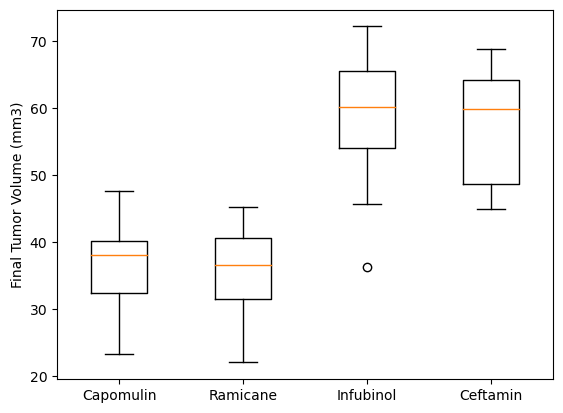

In [346]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot, ax = plt.subplots()

ax.boxplot(tumor_size_by_treatment.values())
ax.set_xticklabels(tumor_size_by_treatment.keys())
ax.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

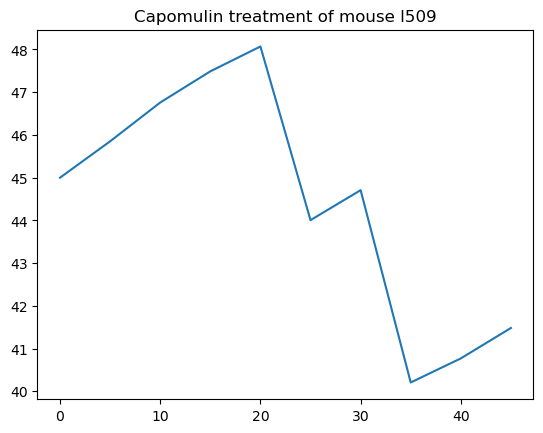

In [347]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = "l509"
selected_mouse_data = mouse_data_clean[mouse_data_clean["Mouse ID"] == selected_mouse]
x_axis = [timepoint for timepoint in selected_mouse_data["Timepoint"]]
y_axis = [volume for volume in selected_mouse_data["Tumor Volume (mm3)"]]

plt.plot(x_axis,y_axis)
plt.title(f"{selected_mouse_data['Drug Regimen'].max()} treatment of mouse {selected_mouse}")
plt.show()

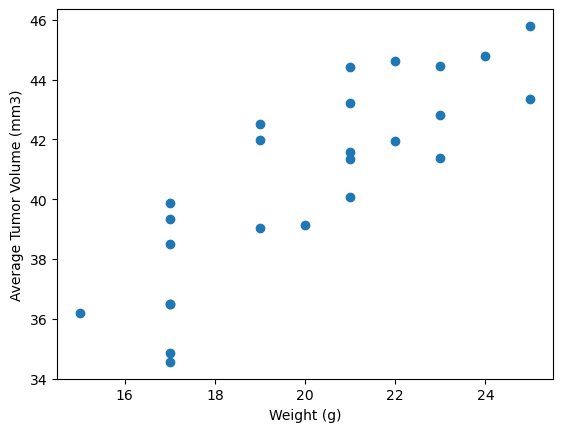

In [348]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse_data = mouse_data_clean[mouse_data_clean["Drug Regimen"] == "Capomulin"]
capomulin_average_tumor_volume = capomulin_mouse_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_mouse_weight = capomulin_mouse_data.groupby("Mouse ID")["Weight (g)"].mean()
x_axis = capomulin_mouse_weight
y_axis = capomulin_average_tumor_volume
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

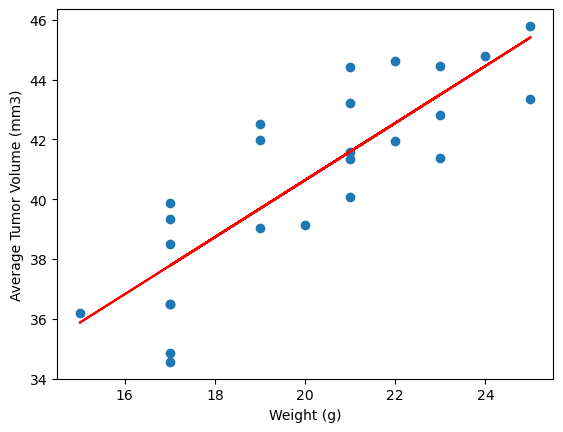

In [349]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values, "r")
plt.show()